In [1]:
import pandas as pd
names=["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5","Class"]
df=pd.read_csv("poker-hand-training-true.data",sep=",",names=names)
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [2]:
df.shape

(25010, 11)

In [3]:
count=df.groupby("Class").count().T
count

Class,0,1,2,3,4,5,6,7,8,9
S1,12493,10599,1206,513,93,54,36,6,5,5
C1,12493,10599,1206,513,93,54,36,6,5,5
S2,12493,10599,1206,513,93,54,36,6,5,5
C2,12493,10599,1206,513,93,54,36,6,5,5
S3,12493,10599,1206,513,93,54,36,6,5,5
C3,12493,10599,1206,513,93,54,36,6,5,5
S4,12493,10599,1206,513,93,54,36,6,5,5
C4,12493,10599,1206,513,93,54,36,6,5,5
S5,12493,10599,1206,513,93,54,36,6,5,5
C5,12493,10599,1206,513,93,54,36,6,5,5


In [4]:
count/len(df)

Class,0,1,2,3,4,5,6,7,8,9
S1,0.49952,0.42379,0.048221,0.020512,0.003719,0.002159,0.001439,0.00024,0.0002,0.0002
C1,0.49952,0.42379,0.048221,0.020512,0.003719,0.002159,0.001439,0.00024,0.0002,0.0002
S2,0.49952,0.42379,0.048221,0.020512,0.003719,0.002159,0.001439,0.00024,0.0002,0.0002
C2,0.49952,0.42379,0.048221,0.020512,0.003719,0.002159,0.001439,0.00024,0.0002,0.0002
S3,0.49952,0.42379,0.048221,0.020512,0.003719,0.002159,0.001439,0.00024,0.0002,0.0002
C3,0.49952,0.42379,0.048221,0.020512,0.003719,0.002159,0.001439,0.00024,0.0002,0.0002
S4,0.49952,0.42379,0.048221,0.020512,0.003719,0.002159,0.001439,0.00024,0.0002,0.0002
C4,0.49952,0.42379,0.048221,0.020512,0.003719,0.002159,0.001439,0.00024,0.0002,0.0002
S5,0.49952,0.42379,0.048221,0.020512,0.003719,0.002159,0.001439,0.00024,0.0002,0.0002
C5,0.49952,0.42379,0.048221,0.020512,0.003719,0.002159,0.001439,0.00024,0.0002,0.0002


Class imbalance.

In [5]:
df_0=df[df["Class"]==0]
df_1=df[df["Class"]==1]
df_2=df[df["Class"]==2]

df_3=df[df["Class"]==3]
df_3=pd.concat([df_3]*4,axis=0)

df_4=df[df["Class"]==4]
df_4=pd.concat([df_4]*5,axis=0)

df_5=df[df["Class"]==5]
df_5=pd.concat([df_5]*5,axis=0)

df_6=df[df["Class"]==6]
df_6=pd.concat([df_6]*5,axis=0)

df_7=df[df["Class"]==7]
df_7=pd.concat([df_7]*5,axis=0)

df_8=df[df["Class"]==8]
df_8=pd.concat([df_8]*5,axis=0)

df_9=df[df["Class"]==9]
df_9=pd.concat([df_9]*5,axis=0)


In [6]:
df=pd.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9],axis=0).sample(frac=1)
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
15017,2,8,2,6,1,2,2,13,4,7,0
16256,1,13,3,9,4,1,2,5,3,7,0
22930,3,12,4,12,4,8,3,4,3,3,1
1066,3,1,2,5,2,3,3,4,3,5,1
19112,1,11,4,11,3,9,4,1,4,3,1


In [9]:
df.shape

(27345, 11)

In [7]:
X=df.drop(["Class"],axis=1)
X.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
15017,2,8,2,6,1,2,2,13,4,7
16256,1,13,3,9,4,1,2,5,3,7
22930,3,12,4,12,4,8,3,4,3,3
1066,3,1,2,5,2,3,3,4,3,5
19112,1,11,4,11,3,9,4,1,4,3


In [8]:
y=df[["Class"]]
y.head()

,Class
15017,0
16256,0
22930,1
1066,1
19112,1


In [10]:
from sklearn import preprocessing
names=X.columns
scaler=preprocessing.StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=names)
X.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,-0.458954,0.270559,-0.444068,-0.269649,-1.347603,-1.340826,-0.439553,1.618668,1.338500,0.013059
1,-1.354237,1.602941,0.447950,0.526603,1.319416,-1.608220,-0.439553,-0.520094,0.445938,0.013059
2,0.436330,1.336465,1.339968,1.322856,1.319416,0.263542,0.456494,-0.787439,0.445938,-1.056892
3,0.436330,-1.594775,-0.444068,-0.535067,-0.458597,-1.073431,0.456494,-0.787439,0.445938,-0.521917
4,-1.354237,1.069988,1.339968,1.057438,0.430410,0.530936,1.352541,-1.589475,1.338500,-1.056892


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import numpy as np

estimator=RandomForestClassifier(n_estimators=150,criterion="entropy",random_state=0)
features=RFECV(estimator,step=1,cv=StratifiedKFold(8),scoring="accuracy")
features.fit(X, np.asarray(y).reshape(y.shape[0],))

print("Optimal number of features : %d" % features.n_features_)

Optimal number of features : 5


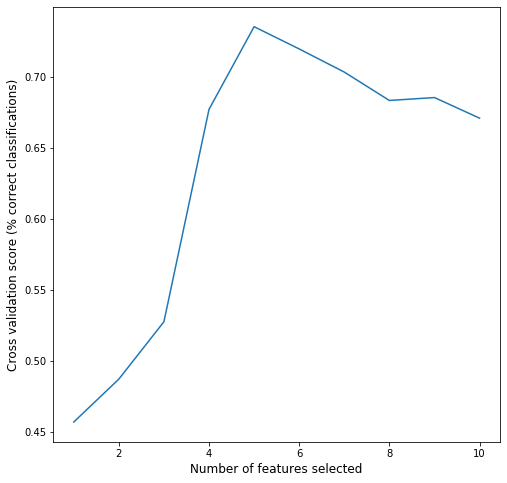

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.xlabel("Number of features selected",fontsize=12)
plt.ylabel("Cross validation score (% correct classifications)",fontsize=12)
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

In [13]:
from sklearn.feature_selection import RFE
selector = RFE(estimator, n_features_to_select=features.n_features_, step=1)
selector = selector.fit(X, np.asarray(y).reshape(y.shape[0],))
selector=pd.DataFrame(selector.ranking_).rename(columns={0:"Importance"})
selector

,Importance
0,4
1,1
2,3
3,1
4,2
5,1
6,6
7,1
8,5
9,1


In [14]:
features=selector[selector["Importance"]==1]
X=X.iloc[:,features.index]
X.head()

,C1,C2,C3,C4,C5
0,0.270559,-0.269649,-1.340826,1.618668,0.013059
1,1.602941,0.526603,-1.608220,-0.520094,0.013059
2,1.336465,1.322856,0.263542,-0.787439,-1.056892
3,-1.594775,-0.535067,-1.073431,-0.787439,-0.521917
4,1.069988,1.057438,0.530936,-1.589475,-1.056892


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)

(24610, 5)
(2735, 5)


In [16]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 7, verbose=2, n_jobs = -1)

In [18]:
rf_random.fit(X_train,y_train)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 131.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 314.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 565.2min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 608.0min finished
C:\Users\kensh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=7,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                 

In [19]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [20]:
from sklearn.metrics import accuracy_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("Accuracy on test data : ",accuracy_score(y_test,y_pred))

Accuracy on test data :  0.7506398537477148


Confusion matrix, without normalization
[[1049  207    0    0    1    2    0    0    0    0]
 [ 351  674    4   10    6    0    0    0    0    0]
 [   5   93   15    2    0    0    0    0    0    0]
 [   0    0    0  216    0    0    0    0    0    0]
 [   0    0    0    0   49    0    0    0    0    1]
 [   0    0    0    0    0   20    0    0    0    0]
 [   0    0    0    0    0    0   16    0    0    0]
 [   0    0    0    0    0    0    0    5    0    0]
 [   0    0    0    0    0    0    0    0    3    0]
 [   0    0    0    0    0    0    0    0    0    6]]
Normalized confusion matrix
[[8.33200953e-01 1.64416203e-01 0.00000000e+00 0.00000000e+00
  7.94281176e-04 1.58856235e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.35885167e-01 6.44976077e-01 3.82775120e-03 9.56937799e-03
  5.74162679e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.34782609e-02 8.08695652e-01 1.30434783e-01 1.73913043e-02
  0.00000000e+00 0.000000

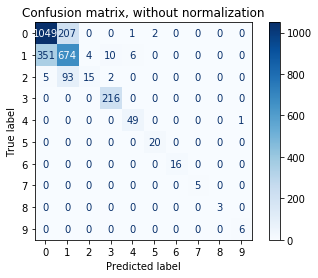

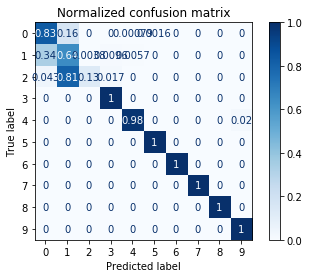

In [22]:

from sklearn.metrics import plot_confusion_matrix


titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    
    disp = plot_confusion_matrix(best_random, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

In [23]:
from sklearn.metrics import classification_report
print("Classification report for test data: \n",classification_report(y_test,y_pred))

Classification report for test data: 
               precision    recall  f1-score   support

           0       0.75      0.83      0.79      1259
           1       0.69      0.64      0.67      1045
           2       0.79      0.13      0.22       115
           3       0.95      1.00      0.97       216
           4       0.88      0.98      0.92        50
           5       0.91      1.00      0.95        20
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       0.86      1.00      0.92         6

    accuracy                           0.75      2735
   macro avg       0.88      0.86      0.85      2735
weighted avg       0.75      0.75      0.74      2735

